In [25]:
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

In [3]:
dataloc='/var/lib/HPCCSystems/mydropzone/couponcontest/'
usersamplefile='user_list.csv'

In [17]:
#help(pd.read_csv)

In [18]:
usersample=pd.read_csv(dataloc+usersamplefile,parse_dates=[1,4])

In [19]:
usersample.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash
0,2012-03-28 14:14:18,f,25,NaN,nan,d9dca3cb44bab12ba313eaa681f663eb
1,2011-05-18 00:41:48,f,34,NaN,東京都,560574a339f1b25e57b0221e486907ed
2,2011-06-13 16:36:58,m,41,NaN,愛知県,e66ae91b978b3229f8fd858c80615b73
3,2012-02-08 12:56:15,m,25,NaN,nan,43fc18f32eafb05713ec02935e2c2825
4,2011-05-22 23:43:56,m,62,NaN,神奈川県,dc6df8aa860f8db0d710ce9d4839840f


In [ ]:
type(None) is None

False

In [79]:
print sum(usersample.WITHDRAW_DATE.isnull())
print sum(usersample.AGE.isnull())

21951
0


In [74]:
usersample.groupby('PREF_NAME').PREF_NAME.count()

PREF_NAME
nan     7256
三重県      138
京都府      318
佐賀県       55
兵庫県      879
北海道      628
千葉県      835
和歌山県      57
埼玉県      874
大分県      107
大阪府     1638
奈良県      180
宮城県      215
宮崎県       74
富山県       70
山口県      110
山形県       60
山梨県       67
岐阜県      171
岡山県      134
岩手県       80
島根県       41
広島県      287
徳島県       57
愛媛県      126
愛知県      938
新潟県      144
東京都     2830
栃木県      165
沖縄県       83
滋賀県      142
熊本県      135
石川県      102
神奈川県    1653
福井県       40
福岡県      731
福島県      121
秋田県       50
群馬県      135
茨城県      187
長崎県      111
長野県      155
青森県       57
静岡県      405
香川県       76
高知県       51
鳥取県       25
鹿児島県      80
Name: PREF_NAME, dtype: int64

In [24]:
usersample.dtypes

REG_DATE         object
SEX_ID           object
AGE               int64
WITHDRAW_DATE    object
PREF_NAME        object
USER_ID_hash     object
dtype: object

In [35]:
def getYear(inpStr):
    return datetime.datetime.strptime(inpStr,'%Y-%m-%d %H:%M:%S').strftime('%Y')
usersample['year']=usersample.REG_DATE.apply(getYear)

In [78]:
datetime.datetime.strptime('2015-04-01 00:00:05','%Y-%m-%d %H:%M:%S')

datetime.datetime(2015, 4, 1, 0, 0, 5)

In [37]:
datetime.datetime.now()

datetime.datetime(2015, 9, 4, 6, 30, 6, 198322)

In [63]:
def getMonths(inpStr):
    inpdate=datetime.datetime.strptime(inpStr,'%Y-%m-%d %H:%M:%S')
    nowdate=datetime.datetime.now()
    delta=nowdate-inpdate
    return int(delta.days*1.0/90)
usersample['months']=usersample.REG_DATE.apply(getMonths)

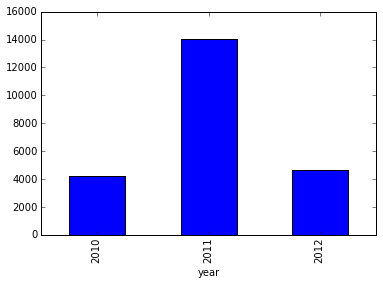

In [64]:
usersample.groupby('year').year.count().plot(kind='bar')

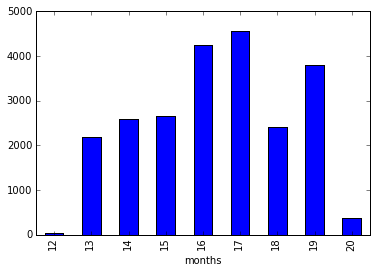

In [65]:
usersample.groupby('months').year.count().plot(kind='bar')

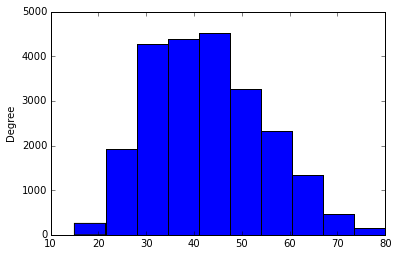

In [13]:
usersample.AGE.plot(kind='hist')
usersample.groupby('PREF_NAME').PREF_NAME.count().plot(kind='bar')

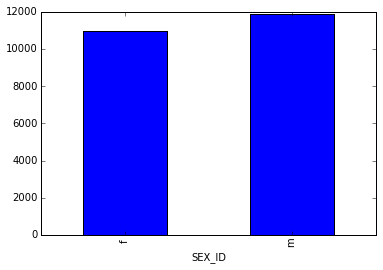

In [15]:
usersample.groupby('SEX_ID').SEX_ID.count().plot(kind='bar')